In [37]:
import pandas as pd
from pandas import DataFrame
import numpy as np
data = pd.read_csv("train.csv", sep = ";")

# Заголовок

тут мы формируем таблицу


In [40]:
def create_tdata(data):
    param = False
    tdata = DataFrame()

    number_of_rooms = []
    parking = []
    name_of_home = []
    elevator = []
    balcone = []
    home_type = []
    toilets = []
    repair = []
    distance = []

    for i in range(len(data)):

        if pd.isnull(data["Количество комнат"][i]):
            number_of_rooms.append(0.0)
        else:
            number_of_rooms.append(data["Количество комнат"][i])
        if pd.isnull(data["Парковка"][i]):
            parking.append("Неизвестно")
        else:
            parking.append(data["Парковка"][i])
        if pd.isnull(data["Название дома (ЖК)"][i]):
            name_of_home.append("Неизвестно")
        else:
            name_of_home.append(data["Название дома (ЖК)"][i])
        if pd.isnull(data["Лифт грузовой (кол-во)"][i]):
            elevator.append(0.0)
        else:
            elevator.append(data["Лифт грузовой (кол-во)"][i])
        if pd.isnull(data["Балкон/лоджия"][i]):
            balcone.append("Нет")
        else:
            balcone.append(data["Балкон/лоджия"][i])
        if pd.isnull(data["Тип дома"][i]):
            home_type.append("Неизвестно")
        else:
            home_type.append(data["Тип дома"][i])
        if pd.isnull(data["Кол-во раздельных санузлов"][i]):
            toilets.append(0.0)
        else:
            toilets.append(data["Кол-во раздельных санузлов"][i])
        if pd.isnull(data["Ремонт"][i]):
            repair.append("Отсутсвует")
        else:
            repair.append(data["Ремонт"][i])


    for i in range(len(data)):
        time = data["Расстояние до метро"][i]
        if not pd.isnull(time):
            time = time.split()
            if time[len(time) - 1] == "транспорте":
                q = float(time[0]) / 4
            else:
                q = float(time[0]) * 0.0833
        else:
            q = 100
        distance.append(q)

    tdata["Количество комнат"] = number_of_rooms
    tdata["Парковка"] = parking
    try:
        tdata["Стоимость"] = data["Стоимость"]
    except:
        param = True
    tdata["Регион"] = data["Регион"]
    tdata["Название дома (ЖК)"] = name_of_home
    tdata["Лифт грузовой (кол-во)"] = elevator
    tdata["Балкон/лоджия"] = balcone
    tdata["Тип дома"] = home_type
    tdata["Кол-во раздельных санузлов"] = toilets
    tdata["Ремонт"] = repair
    tdata["Расстояние до метро"] = distance
    return tdata

tdata = create_tdata(data)

In [39]:
tdata

,Количество комнат,Парковка,Стоимость,Регион,Название дома (ЖК),Лифт грузовой (кол-во),Балкон/лоджия,Тип дома,Кол-во раздельных санузлов,Ремонт,Расстояние до метро
0,2.0,подземная,7073030,Москва,ЖК «Белая звезда»,1.0,Балкон,Монолитный,1.0,Отсутсвует,3.00
1,3.0,подземная,7799940,Москва,ЖК «Белая звезда»,1.0,Балкон,Монолитный,1.0,Отсутсвует,3.00
2,2.0,Неизвестно,11700000,Москва,ЖК «Хорошевский»,2.0,Нет,Монолитный,2.0,Отсутсвует,0.75
3,2.0,подземная,6055000,Красногорск,ЖК «Рублевское предместье»,1.0,Балкон,Монолитный,0.0,Отсутсвует,100.00
4,1.0,Неизвестно,2710780,Истра,ЖК «Павловский квартал»,0.0,Нет,Кирпичный,1.0,Отсутсвует,8.25
...,...,...,...,...,...,...,...,...,...,...,...
29039,2.0,Неизвестно,4312500,Истра,ЖК «Павловский квартал»,0.0,Нет,Кирпичный,1.0,Отсутсвует,100.00
29040,3.0,Неизвестно,5102860,Истра,ЖК «Павловский квартал»,0.0,Нет,Кирпичный,1.0,Отсутсвует,5.75
29041,3.0,Неизвестно,5376000,Истра,ЖК «Павловский квартал»,0.0,Нет,Кирпичный,1.0,Отсутсвует,100.00
29042,3.0,Неизвестно,7000000,Балашихинский,ЖК «Эдельвейс-Комфорт»,1.0,Нет,Неизвестно,2.0,Без ремонта,100.00


In [18]:
tdata


,Количество комнат,Парковка,Стоимость,Регион,Название дома (ЖК),Лифт грузовой (кол-во),Балкон/лоджия,Тип дома,Кол-во раздельных санузлов,Ремонт,Расстояние до метро
0,0.333333,1.0,7073030,0.571429,0.186207,0.066667,0.0,0.4,0.333333,1.0,0.0300
1,0.500000,1.0,7799940,0.571429,0.186207,0.066667,0.0,0.4,0.333333,1.0,0.0300
2,0.333333,0.5,11700000,0.571429,0.912069,0.133333,2.0,0.4,0.666667,1.0,0.0075
3,0.333333,1.0,6055000,0.392857,0.775862,0.066667,0.0,0.4,0.000000,1.0,1.0000
4,0.166667,0.5,2710780,0.285714,0.679310,0.000000,2.0,0.0,0.333333,1.0,0.0825
...,...,...,...,...,...,...,...,...,...,...,...
29039,0.333333,0.5,4312500,0.285714,0.679310,0.000000,2.0,0.0,0.333333,1.0,1.0000
29040,0.500000,0.5,5102860,0.285714,0.679310,0.000000,2.0,0.0,0.333333,1.0,0.0575
29041,0.500000,0.5,5376000,0.285714,0.679310,0.000000,2.0,0.0,0.333333,1.0,1.0000
29042,0.500000,0.5,7000000,0.017857,0.936207,0.066667,2.0,0.6,0.666667,0.0,1.0000


In [20]:
tdata

,Количество комнат,Парковка,Стоимость,Регион,Название дома (ЖК),Лифт грузовой (кол-во),Балкон/лоджия,Тип дома,Кол-во раздельных санузлов,Ремонт,Расстояние до метро
0,0.333333,1.0,7073030,0.571429,0.186207,0.066667,0.0,0.4,0.333333,1.0,0.0300
1,0.500000,1.0,7799940,0.571429,0.186207,0.066667,0.0,0.4,0.333333,1.0,0.0300
2,0.333333,0.5,11700000,0.571429,0.912069,0.133333,2.0,0.4,0.666667,1.0,0.0075
3,0.333333,1.0,6055000,0.392857,0.775862,0.066667,0.0,0.4,0.000000,1.0,1.0000
4,0.166667,0.5,2710780,0.285714,0.679310,0.000000,2.0,0.0,0.333333,1.0,0.0825
...,...,...,...,...,...,...,...,...,...,...,...
29039,0.333333,0.5,4312500,0.285714,0.679310,0.000000,2.0,0.0,0.333333,1.0,1.0000
29040,0.500000,0.5,5102860,0.285714,0.679310,0.000000,2.0,0.0,0.333333,1.0,0.0575
29041,0.500000,0.5,5376000,0.285714,0.679310,0.000000,2.0,0.0,0.333333,1.0,1.0000
29042,0.500000,0.5,7000000,0.017857,0.936207,0.066667,2.0,0.6,0.666667,0.0,1.0000


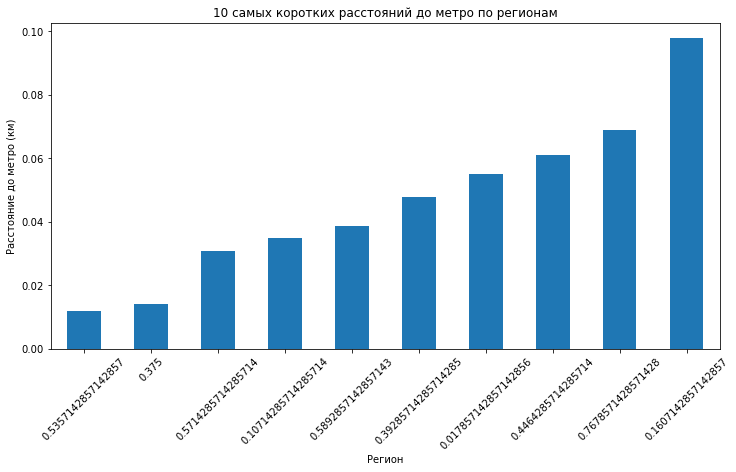

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Предполагается, что у вас уже есть DataFrame с названием df

# Группировка данных по региону и вычисление среднего значения расстояния до метро
region_distance_mean = tdata.groupby('Регион')['Расстояние до метро'].mean()

# Сортировка данных по возрастанию расстояния до метро
sorted_region_distance = region_distance_mean.sort_values(ascending=True)

# Выбор 10 самых коротких расстояний до метро
top_10_shortest_distances = sorted_region_distance.head(10)

# Создание графика
plt.figure(figsize=(12, 6))
top_10_shortest_distances.plot(kind='bar')
plt.title('10 самых коротких расстояний до метро по регионам')
plt.xlabel('Регион')
plt.ylabel('Расстояние до метро (км)')
plt.xticks(rotation=45)
plt.show()


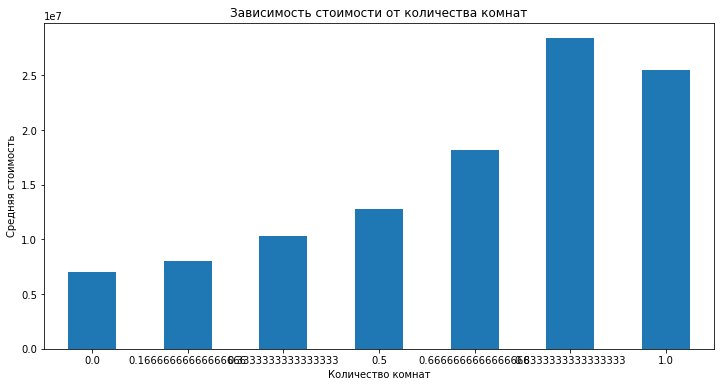

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Предполагается, что у вас уже есть DataFrame с названием df

# Группировка данных по количеству комнат и вычисление средней стоимости
rooms_price_mean = tdata.groupby('Количество комнат')['Стоимость'].mean()

# Создание графика
plt.figure(figsize=(12, 6))
rooms_price_mean.plot(kind='bar')
plt.title('Зависимость стоимости от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Средняя стоимость')
plt.xticks(rotation=0)
plt.show()

<Figure size 576x432 with 0 Axes>

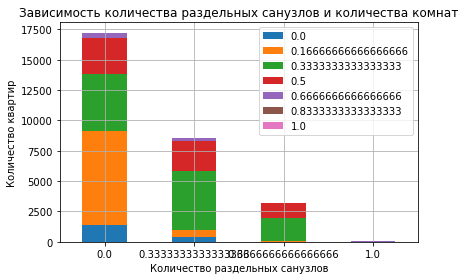

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Предполагается, что у вас уже есть DataFrame с названием df

# Получение уникальных значений количества раздельных санузлов и количества комнат
sanit_units = tdata['Кол-во раздельных санузлов'].unique()
room_counts = tdata['Количество комнат'].unique()

# Сортировка значений в порядке возрастания
sanit_units.sort()
room_counts.sort()

# Создание пустого DataFrame с уникальными значениями комнат в качестве индексов и столбцов
data = pd.DataFrame(index=sanit_units, columns=room_counts)

# Заполнение DataFrame количеством комнат для каждой комбинации
for sanit_unit in sanit_units:
    for room_count in room_counts:
        count = len(tdata[(tdata['Кол-во раздельных санузлов'] == sanit_unit) & (tdata['Количество комнат'] == room_count)])
        data.loc[sanit_unit, room_count] = count

# Фильтрация уникальных значений количества комнат
unique_room_counts = data.columns.tolist()

# Создание столбчатой сложенной диаграммы
plt.figure(figsize=(8, 6))  # Размер графика 8x6 дюймов
data[unique_room_counts].plot(kind='bar', stacked=True)
plt.title('Зависимость количества раздельных санузлов и количества комнат')
plt.xlabel('Количество раздельных санузлов')
plt.ylabel('Количество квартир')
plt.xticks(rotation=0)  # Поворот значений оси x
plt.grid(True)  # Включение сетки на графике
plt.tight_layout()  # Добавлено для улучшения отображения
plt.show()

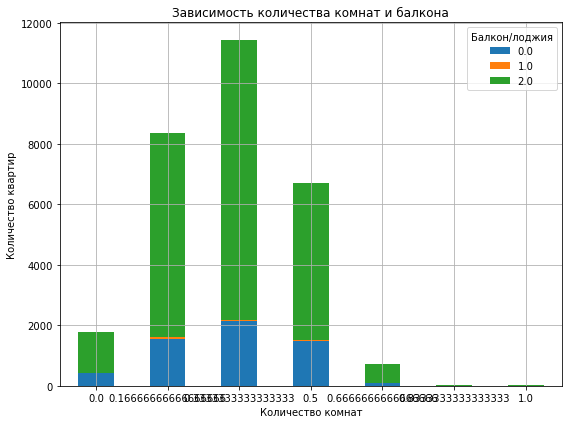

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Предполагается, что у вас уже есть DataFrame с названием df

# Группировка данных по количеству комнат и балкону, подсчет количества записей
data = tdata.groupby(['Количество комнат', 'Балкон/лоджия']).size().unstack()

# Создание графика
data.plot(kind='bar', stacked=True, figsize=(8, 6))

# Настройка внешнего вида графика
plt.title('Зависимость количества комнат и балкона')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.xticks(rotation=0)
plt.legend(title='Балкон/лоджия', loc='upper right')
plt.grid(True)
plt.tight_layout()

# Отображение графика
plt.show()

In [8]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
categorical_features = ['Парковка', 'Регион', 'Название дома (ЖК)', 'Балкон/лоджия', 'Тип дома', 'Ремонт']
tdata[categorical_features] = ordinal_encoder.fit_transform(tdata[categorical_features])


In [9]:
tdata

,Количество комнат,Парковка,Стоимость,Регион,Название дома (ЖК),Лифт грузовой (кол-во),Балкон/лоджия,Тип дома,Кол-во раздельных санузлов,Ремонт,Расстояние до метро
0,2.0,2.0,7073030,32.0,108.0,1.0,0.0,2.0,1.0,4.0,3.00
1,3.0,2.0,7799940,32.0,108.0,1.0,0.0,2.0,1.0,4.0,3.00
2,2.0,1.0,11700000,32.0,529.0,2.0,2.0,2.0,2.0,4.0,0.75
3,2.0,2.0,6055000,22.0,450.0,1.0,0.0,2.0,0.0,4.0,100.00
4,1.0,1.0,2710780,16.0,394.0,0.0,2.0,0.0,1.0,4.0,8.25
...,...,...,...,...,...,...,...,...,...,...,...
29039,2.0,1.0,4312500,16.0,394.0,0.0,2.0,0.0,1.0,4.0,100.00
29040,3.0,1.0,5102860,16.0,394.0,0.0,2.0,0.0,1.0,4.0,5.75
29041,3.0,1.0,5376000,16.0,394.0,0.0,2.0,0.0,1.0,4.0,100.00
29042,3.0,1.0,7000000,1.0,543.0,1.0,2.0,3.0,2.0,0.0,100.00


In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numeric_features = ['Количество комнат', 'Парковка', 'Регион', 'Название дома (ЖК)', 'Тип дома', 'Ремонт', 'Лифт грузовой (кол-во)', 'Кол-во раздельных санузлов', 'Расстояние до метро']
tdata[numeric_features] = scaler.fit_transform(tdata[numeric_features])


In [11]:
tdata

,Количество комнат,Парковка,Стоимость,Регион,Название дома (ЖК),Лифт грузовой (кол-во),Балкон/лоджия,Тип дома,Кол-во раздельных санузлов,Ремонт,Расстояние до метро
0,0.333333,1.0,7073030,0.571429,0.186207,0.066667,0.0,0.4,0.333333,1.0,0.0300
1,0.500000,1.0,7799940,0.571429,0.186207,0.066667,0.0,0.4,0.333333,1.0,0.0300
2,0.333333,0.5,11700000,0.571429,0.912069,0.133333,2.0,0.4,0.666667,1.0,0.0075
3,0.333333,1.0,6055000,0.392857,0.775862,0.066667,0.0,0.4,0.000000,1.0,1.0000
4,0.166667,0.5,2710780,0.285714,0.679310,0.000000,2.0,0.0,0.333333,1.0,0.0825
...,...,...,...,...,...,...,...,...,...,...,...
29039,0.333333,0.5,4312500,0.285714,0.679310,0.000000,2.0,0.0,0.333333,1.0,1.0000
29040,0.500000,0.5,5102860,0.285714,0.679310,0.000000,2.0,0.0,0.333333,1.0,0.0575
29041,0.500000,0.5,5376000,0.285714,0.679310,0.000000,2.0,0.0,0.333333,1.0,1.0000
29042,0.500000,0.5,7000000,0.017857,0.936207,0.066667,2.0,0.6,0.666667,0.0,1.0000


KNN

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_log_error
import numpy as np

def calculate_rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))


X = tdata.drop('Стоимость', axis=1)
y = tdata['Стоимость']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k = 3

knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

rmsle = calculate_rmsle(y_test, y_pred)
print("RMSLE:", rmsle)



RMSLE: 0.2287427095641718


RandomForest

In [35]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import train_test_split
import numpy as np

X = tdata.drop("Стоимость", axis=1).values
y = tdata["Стоимость"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
print("RMSLE:", rmsle)


RMSLE: 0.16989655647149476


In [44]:
df = pd.read_csv("test.csv", sep = ";")

X = create_tdata(df)

ordinal_encoder = OrdinalEncoder()
categorical_features = ['Парковка', 'Регион', 'Название дома (ЖК)', 'Балкон/лоджия', 'Тип дома', 'Ремонт']
X[categorical_features] = ordinal_encoder.fit_transform(X[categorical_features])

X = scaler.transform(X)

pred = rf.predict(X)

pred_df = pd.DataFrame({"ID": df["ID"], "Стоимость": [int(i) for i in list(pred)]})
pred_df.to_csv('test_answer.csv', sep=';', encoding='utf-8', index=False)